In [20]:
import pandas as pd
import pydicom, numpy as np
import matplotlib.pyplot as plt

In [40]:
def parse_data(df):
    extract_box = lambda row: [row['y'], row['x'], row['height'], row['width']]
    parsed = {}
    
    for n, row in df.iterrows():
        pid = row['patientId']
        if pid not in parsed:
            parsed[pid] = {
                'dicom':'C:/Users/220222/Downloads/rsna/stage_1_train_images/%s.dcm' % pid,
                'label': row['Target'],
                'boxes': []
            }
            
        if row['Target'] == 1:
            parsed[pid]['boxes'].append(extract_box(row))
                
    return parsed


def draw(data):
    """
    Method to draw image for single patient
    """
    d = pydicom.read_file(data['dicom'])
    im = d.pixel_array
    
    # Convert from single-channel grayscale to 3-channel RGB
    im = np.stack([im] * 3, axis=2)
    
    # --- Add boxes with random color if present
    for box in data['boxes']:
        rgb = np.floor(np.random.rand(3) * 256).astype('int')
        im = overlay_box(im=im, box=box, rgb=rgb, stroke=6)
    
    plt.imshow(im, cmap=plt.cm.gist_gray)
    plt.axis('off')

    
def overlay_box(im, box, rgb, stroke=1):
    box = [int(b) for b in box]
    y1, x1, height, width = box
    y2 = y1 + height
    x2 = x1 + width
    
    im[y1:y1 + stroke, x1:x2] = rgb
    #im[y2:y2 + stroke, x1:x2] = rgb
    #im[y1:y2, x1:x1 + stroke] = rgb
    #im[y1:y2, x2:x2 + stroke] = rgb
    
    return im

In [38]:
df = pd.read_csv('C:/Users/220222/Downloads/rsna/stage_1_train_labels.csv')
patient_class = pd.read_csv('C:/Users/220222/Downloads/rsna/stage_1_detailed_class_info.csv', index_col=0)
parsed = parse_data(df)

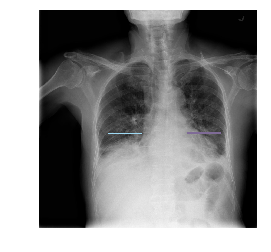

In [41]:
draw(parsed[df['patientId'][8]])